In [10]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [11]:
import datetime
import pyucrio

rio = pyucrio.PyUCRio()
rio_tools = rio.tools

In [ ]:
# First, let's make a single plot of Riometer data from a few sites
start_dt = datetime.datetime(2023, 11, 5, 0, 0)
end_dt = datetime.datetime(2023, 11, 5, 23, 59)
r_list = []

# Download NORSTAR Riometer data from a couple site
dataset_name = "NORSTAR_RIOMETER_K2_TXT"
site_uid = ["chur","daws", "rabb"]
for site in site_uid:
    r = rio.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site)
    r_list.append(r)

# Read in all the data
rio_data_list = []
for r in r_list:
    data = rio.data.ucalgary.read(r.dataset, r.filenames, n_parallel=2) 
    rio_data_list.append(data)

In [13]:
# Call the plotting function. We'll plot the raw signal first
# rio_tools.plot(data_list, yrange=[0,10], xrange=[start_dt,end_dt])

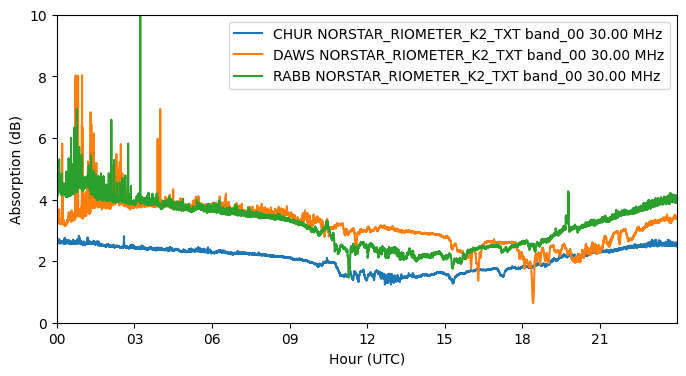

In [14]:
# Call the plot function
rio_tools.plot(rio_data_list, absorption=True, yrange=[0, 10], xrange=[start_dt, end_dt])

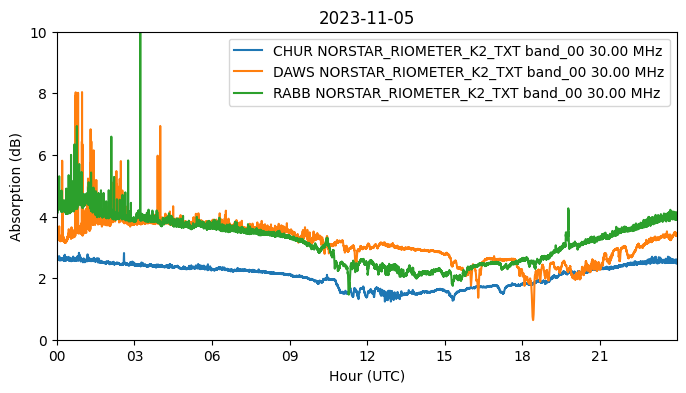

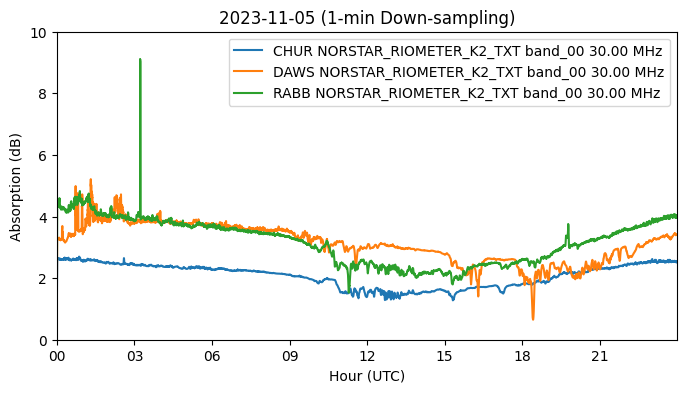

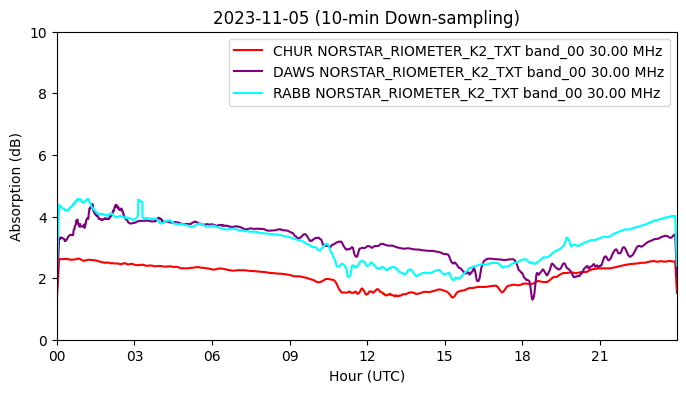

In [15]:
# Plot the absorption instead.
rio_tools.plot(rio_data_list, absorption=True, yrange=[0,10], xrange=[start_dt,end_dt], title="2023-11-05")

# Plot again, this time down-sampling to 1-minute intervals
rio_tools.plot(rio_data_list, absorption=True, yrange=[0,10], xrange=[start_dt,end_dt], downsample_seconds=60, title="2023-11-05 (1-min Down-sampling)")

# And 10-minute intervals - let's also change up the colors
rio_tools.plot(rio_data_list, absorption=True, yrange=[0,10], xrange=[start_dt,end_dt], color=['red', 'purple', 'cyan'], downsample_seconds=600, title="2023-11-05 (10-min Down-sampling)")

In [16]:
# Let's instead look at some Hyper-Spectral Riometer data
start_dt = datetime.datetime(2023, 11, 5, 0, 0)
end_dt = datetime.datetime(2023, 11, 5, 23, 59)
r_list = []

# Download some SWAN HSR data from two sites
dataset_name = "SWAN_HSR_K0_H5"
site_uid = ["medo", "russ"]
for site in site_uid:
    r = rio.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site)
    r_list.append(r)

# Read in the data
hsr_data_list = []
for r in r_list:
    data = rio.data.ucalgary.read(r.dataset, r.filenames, n_parallel=2) 
    hsr_data_list.append(data)

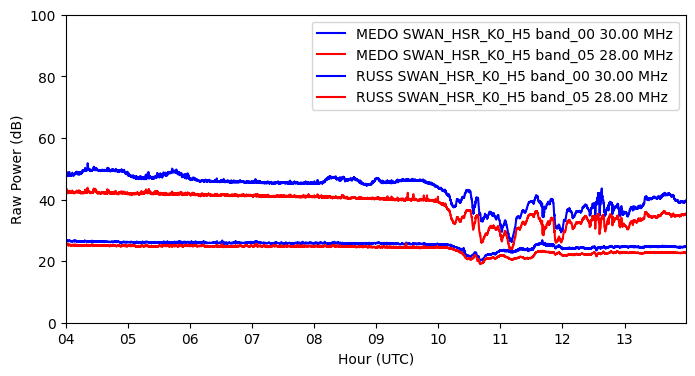

In [17]:
# Let's restrict our plotting range a bit in the time axis
plot_start_dt = datetime.datetime(2023, 11, 5, 4, 0)
plot_end_dt = datetime.datetime(2023, 11, 5, 13, 59)

# Let's select the bands we are interested in plotting
hsr_bands = [0,5]

rio_tools.plot(hsr_data_list, yrange=[0,100], xrange=[plot_start_dt,plot_end_dt], hsr_bands=hsr_bands, color=['blue','red'], downsample_seconds=10)

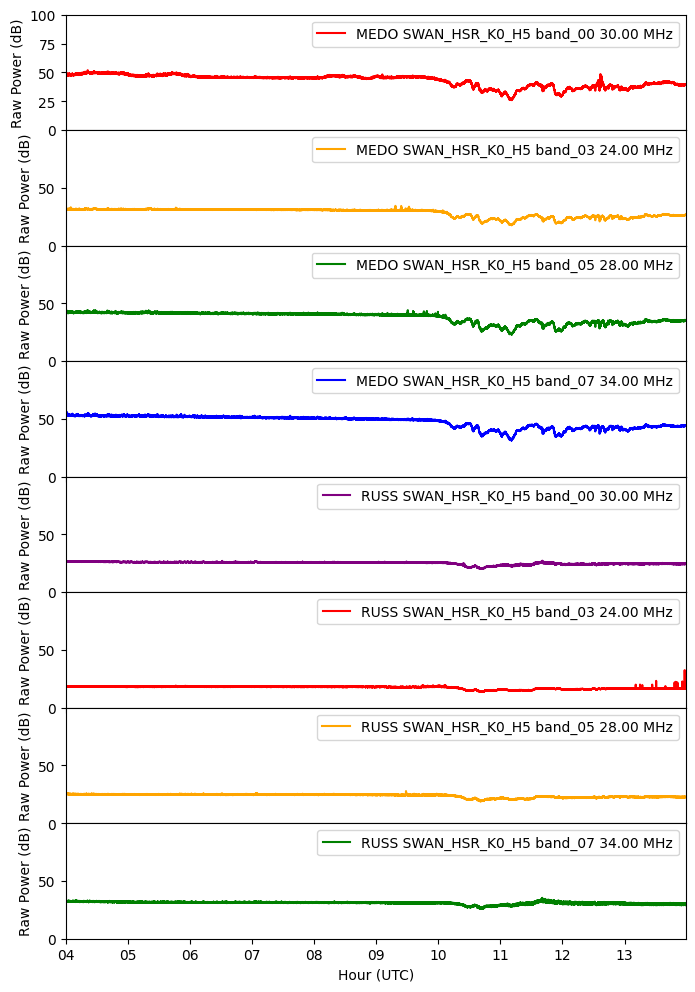

In [23]:
# If interested in a large number of bands, a stack-plot can be easier to read
# Let's make one!

# Again restrict our plotting range a bit in the time axis
plot_start_dt = datetime.datetime(2023, 11, 5, 4, 0)
plot_end_dt = datetime.datetime(2023, 11, 5, 13, 59)

# Let's select a few more bands
hsr_bands = [0,3,5,7]
colors = ['red', 'orange', 'green', 'blue', 'purple']
# Enable the stack plot option this time... we will need to adjust the figure size
rio_tools.plot(hsr_data_list, yrange=[0,100], xrange=[plot_start_dt,plot_end_dt], hsr_bands=hsr_bands, color=colors, stack_plot=True, figsize=(8,12))